In [34]:
from getpass import getpass               # for login password prompts

import time
import numpy as np                        # for manipulating arrays
import pandas as pd
import json                               # to pretty-print dicts

from astropy import units as u            # astropy utilities
from astropy.coordinates import SkyCoord
from astropy.table import Table

from matplotlib import pyplot as plt      # visualization libs
from IPython.display import display
from dl.helpers.utils import convert
%matplotlib inline

# Data Lab imports
from dl import storeClient as sc          # needed to use virtual storage
from dl import queryClient as qc          # needed to query Data Lab catalogs
from dl import authClient as ac           # needed for login authentication

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import svm

In [2]:
token = ac.login(input("Enter user name: "), getpass("Enter password: "))

Enter user name:  jlmaurora
Enter password:  ···········


In [3]:
# retrieve data from ls

In [ ]:
# SVM to exmine intercorrelations 
# XGBoost, AdaBoost
# apply the transformations of svm to the training dataset

# Get training data

In [3]:
# get training data
# remove inf

content_BD_LS_SDSS_WISE = []

with open('BD_LS_SDSS_WISE.csv', 'r') as fr:
    for line in fr:
        if 'inf' in line.lower():
            print(line)
        else:
            content_BD_LS_SDSS_WISE.append(line)

with open('BD_LS_SDSS_WISE.processed.csv', 'w') as fw:
    for line in content_BD_LS_SDSS_WISE:
        fw.write(line)
        
content_highzQSO_LS_SDSS_WISE = []

with open('highzQSO_LS_SDSS_WISE.csv', 'r') as fr:
    for line in fr:
        if 'inf' in line.lower():
            print(line)
        else:
            content_highzQSO_LS_SDSS_WISE.append(line)

with open('highzQSO_LS_SDSS_WISE.processed.csv', 'w') as fw:
    for line in content_highzQSO_LS_SDSS_WISE:
        fw.write(line)

1.5854,-17.3475,inf,inf,18.213,184.33599999999998,16.1442,16.4723,0.0,0.0,51.856,348.597,257.67900000000003,0.5966666280866719,,,,,,,,,,,,,,,,

2.2073,-17.6564,inf,inf,20.5169,24.4666,19.2606,18.2263,0.0,0.0,6.21234,19.7585,51.223,2.41423328734635,,,,,,,,,,,,,,,,

3.4953,-18.2797,inf,inf,19.3178,100.979,17.2554,17.4796,0.0,0.0,18.7449,125.271,101.9,2.68909302054212,,,,,,,,,,,,,,,,

7.231,-19.4546,inf,inf,16.4873,838.5930000000001,15.1985,15.581,0.0,0.0,254.15200000000002,832.95,585.599,1.8297062716930699,,,,,,,,,,,,,,,,

21.191999999999997,-57.7604,26.2514,inf,18.7086,150.981,16.4744,16.7199,0.031581,0.0,32.8519,257.17900000000003,205.13299999999998,0.10161605395849099,,,,,,,,,,,,,,,,

25.4926,-46.5659,inf,inf,17.459,576.332,15.2635,15.5084,0.0,0.0,103.845,784.533,626.092,2.0752016148202,,,,,,,,,,,,,,,,

26.5048,-45.7573,inf,inf,16.6083,711.357,15.4394,15.8325,0.0,0.0,227.345,667.192,464.50300000000004,2.86808595464195,,,,,,,,,,,,,,,,

48.4352,4.5546,inf,inf,15.4486,1164.91,15.054,15.4

In [4]:
# the training data
#cols=['ls_mag_g', 'ls_mag_r', 'ls_mag_z', 'mag_w1', 'mag_w2', 'ls_flux_g', 'ls_flux_r', 'ls_flux_z', 'flux_w1', 'flux_w2'] # high_z and brown dwarf files' column names 
cols=['ls_mag_g', 'ls_mag_r', 'ls_mag_z', 'mag_w1', 'mag_w2']
high_z = pd.read_csv('highzQSO_LS_SDSS_WISE.processed.csv', index_col=False, usecols=cols, dtype='float64')
BD = pd.read_csv('BD_LS_SDSS_WISE.processed.csv', index_col=False, usecols=cols, dtype='float64')

## Deal with NaN and Inf

https://towardsdatascience.com/whats-the-best-way-to-handle-nan-values-62d50f738fc

https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e

In [5]:
print('high_z df description')
high_z.describe()

high_z df description


,ls_mag_g,ls_mag_r,ls_mag_z,mag_w1,mag_w2
count,192.000000,334.000000,405.000000,400.000000,385.000000
mean,26.332592,23.461607,20.638831,20.027608,19.832963
std,1.492159,1.975984,1.209121,1.262202,1.217379
min,22.525300,19.722200,17.952500,17.114700,16.928000
25%,25.421250,21.815725,19.721400,19.142700,19.012300
50%,26.133550,23.277100,20.443300,19.800600,19.649300
75%,27.129850,24.798125,21.465300,20.622775,20.426000
max,31.043300,29.439300,24.104500,25.369800,25.262900


In [6]:
print('BD df description')
BD.describe()

BD df description


,ls_mag_g,ls_mag_r,ls_mag_z,mag_w1,mag_w2
count,1204.000000,1444.000000,1576.000000,1565.000000,1565.000000
mean,24.356734,22.535946,19.094431,17.562058,17.584712
std,2.497297,2.447995,2.293321,2.194076,1.838846
min,8.270590,7.564740,10.652900,7.610080,7.987810
25%,23.613700,21.586800,17.851250,16.277200,16.609700
50%,24.722750,22.645000,18.790200,17.371300,17.686700
75%,25.747350,23.878075,20.565025,18.912400,18.756500
max,31.154400,32.150600,25.355500,26.722900,23.433100


### replace nan, inf with mean

In [7]:
high_z_replace = {}
BD_replace = {}
for col in cols:
    high_z[col] = high_z[col].replace([np.nan, np.inf, -np.inf], high_z[col].mean())
    BD[col] = BD[col].replace([np.nan, np.inf, -np.inf], BD[col].mean())
    high_z_replace[col] = high_z[col].mean()
    BD_replace[col] = BD[col].mean()

the replacement vals are:

In [8]:
print('high_z_replace: ', high_z_replace)
print('BD_replace: ', BD_replace)

high_z_replace:  {'ls_mag_g': 26.3325921875, 'ls_mag_r': 23.46160748502994, 'ls_mag_z': 20.63883061728395, 'mag_w1': 20.027607999999997, 'mag_w2': 19.832962857142856}
BD_replace:  {'ls_mag_g': 24.35673377076412, 'ls_mag_r': 22.535946024930748, 'ls_mag_z': 19.094431154822335, 'mag_w1': 17.56205808306709, 'mag_w2': 17.584711853035145}


In [9]:
'''high_z_mag = high_z.loc[high_z["ls_mag_g"] != high_z_replace['ls_mag_g']].drop(columns=['ls_flux_g', 'ls_flux_r', 'ls_flux_z', 'flux_w1', 'flux_w2'], axis=1)
high_z_flux = high_z.loc[high_z["ls_mag_g"] == high_z_replace['ls_mag_g']].drop(columns=['ls_mag_g', 'ls_mag_r', 'ls_mag_z', 'mag_w1', 'mag_w2'], axis=1)'''

'high_z_mag = high_z.loc[high_z["ls_mag_g"] != high_z_replace[\'ls_mag_g\']].drop(columns=[\'ls_flux_g\', \'ls_flux_r\', \'ls_flux_z\', \'flux_w1\', \'flux_w2\'], axis=1)\nhigh_z_flux = high_z.loc[high_z["ls_mag_g"] == high_z_replace[\'ls_mag_g\']].drop(columns=[\'ls_mag_g\', \'ls_mag_r\', \'ls_mag_z\', \'mag_w1\', \'mag_w2\'], axis=1)'

In [10]:
#high_z = high_z.replace([np.inf, -np.inf, np.nan], 0.)
#BD = BD.replace([np.inf, -np.inf, np.nan], 0.)

In [11]:
# get color labels
g = cols[0]
r = cols[1]
z = cols[2]
w1 = cols[3]
w2 = cols[4]
    
# get magnitudes
qso_mag_g = high_z[g]
qso_mag_r = high_z[r]
qso_mag_z = high_z[z]
qso_mag_w1 = high_z[w1]
qso_mag_w2 = high_z[w2]
        
bd_mag_g = BD[g]
bd_mag_r = BD[r]
bd_mag_z = BD[z]
bd_mag_w1 = BD[w1]
bd_mag_w2 = BD[w2]
    
# construct dataframes
# if label=1, it's a qso; if label=0, it's a bd
data_qso = pd.DataFrame({'g': qso_mag_g, 'r': qso_mag_r, 'z': qso_mag_z, 'w1': qso_mag_w1, 'w2': qso_mag_w2, 'label': np.ones(len(qso_mag_g))})
# data_qso.replace([np.inf, 0, -999.0, -np.inf], np.nan,inplace=True) # get rid of Inf
data_bd = pd.DataFrame({'g': bd_mag_g, 'r': bd_mag_r, 'z': bd_mag_z, 'w1': bd_mag_w1, 'w2': bd_mag_w2, 'label': np.zeros(len(bd_mag_g))})
# data_bd.replace([np.inf, 0, -999.0, -np.inf], np.nan,inplace=True)# get rid of Inf

In [12]:
# put the data containing info about qso and bd together
data_train = pd.concat([data_qso, data_bd], ignore_index=True).dropna() # make sure that the data is lined up
X = data_train[['g', 'r', 'z', 'w1', 'w2']]
y = data_train['label']

# Color-color plots

In [13]:
def color_color(qso1, qso2, qso3, qso4, bd1, bd2, bd3, bd4, x_lab, y_lab):
    # x: qso1-qso2
    # y: qso3-qso4
    # same for bd
    plt.scatter(qso1 - qso2, qso3 - qso4, marker='*', alpha=0.4, label='qso')
    plt.scatter(bd1 - bd2, bd3 - bd4, marker='o', alpha=0.4, label='BD')
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    plt.legend()
    plt.show()

In [14]:
# g r z w1 w2
# no i band

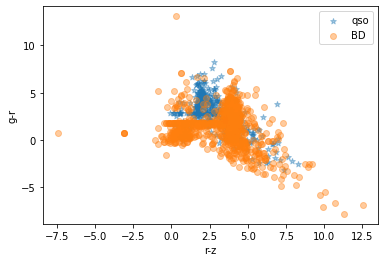

In [15]:
# g-r VS r-z
# g-r: 2-7    r-z: 1.5-2.5
color_color(qso_mag_r, qso_mag_z, qso_mag_g, qso_mag_r, bd_mag_r, bd_mag_z, bd_mag_g, bd_mag_r, 'r-z', 'g-r')

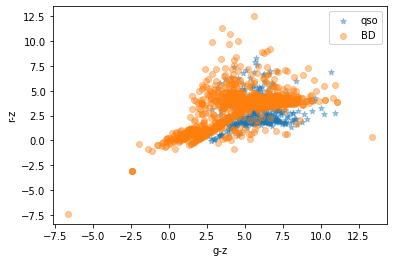

In [16]:
# r-z VS g-z
# r-z: 1.5-2.5    g-z: 4-9 or simply >4
color_color(qso_mag_g, qso_mag_z, qso_mag_r, qso_mag_z, bd_mag_g, bd_mag_z, bd_mag_r, bd_mag_z, 'g-z', 'r-z')

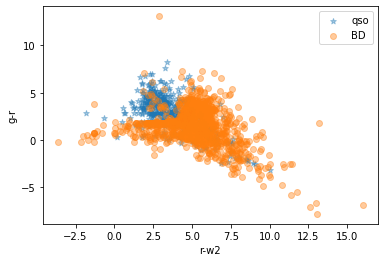

In [17]:
# g-r VS r-w2
# g-r: 2-7 or >2      r-w2: 1.7-3.2
color_color(qso_mag_r, qso_mag_w2, qso_mag_g, qso_mag_r, bd_mag_r, bd_mag_w2, bd_mag_g, bd_mag_r, 'r-w2', 'g-r')

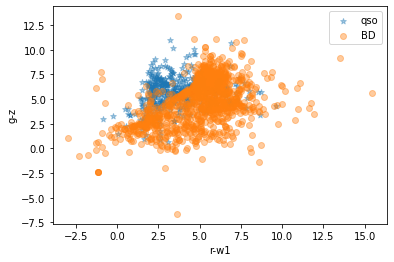

In [18]:
# g-z VS r-w1
# g-z: 4-9 or > 4         r-w1: 1.8-3
color_color(qso_mag_r, qso_mag_w1, qso_mag_g, qso_mag_z, bd_mag_r, bd_mag_w1, bd_mag_g, bd_mag_z, 'r-w1', 'g-z')

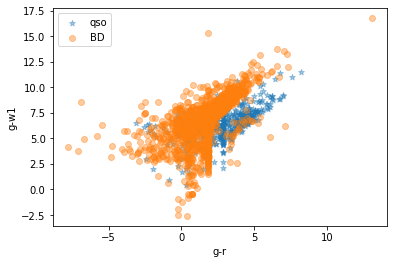

In [19]:
# g-w1 VS g-r
# g-w1: 5-7      g-r: 3.5-5
color_color(qso_mag_g, qso_mag_r, qso_mag_g, qso_mag_w1, bd_mag_g, bd_mag_r, bd_mag_g, bd_mag_w1, 'g-r', 'g-w1')

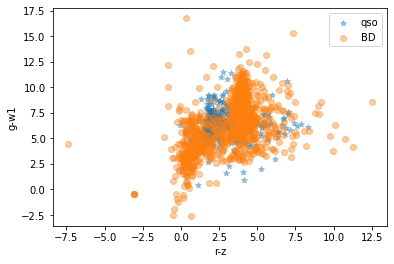

In [20]:
# r-z VS z-w1
# 
color_color(qso_mag_r, qso_mag_z, qso_mag_g, qso_mag_w1, bd_mag_r, bd_mag_z, bd_mag_g, bd_mag_w1, 'r-z', 'g-w1')

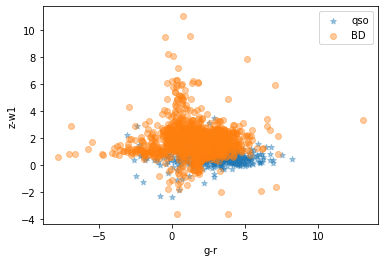

In [21]:
# g-r VS z-w1
color_color(qso_mag_g, qso_mag_r, qso_mag_z, qso_mag_w1, bd_mag_g, bd_mag_r, bd_mag_z, bd_mag_w1, 'g-r', 'z-w1')

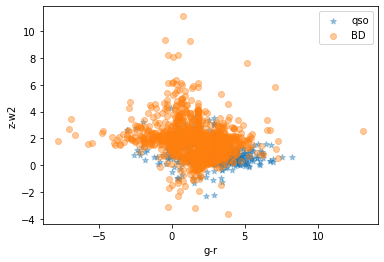

In [22]:
# g-r VS z-w2
color_color(qso_mag_g, qso_mag_r, qso_mag_z, qso_mag_w2, bd_mag_g, bd_mag_r, bd_mag_z, bd_mag_w2, 'g-r', 'z-w2')

| y | x | ratio (y/x) |
| :-: | :-: | :-: |
| g-r: 2-7 | r-z: 1.5-2.5 | 1.3-2.8 |
| r-z: 1.5-2.5 | g-z: 4-9 or simply >4 | 0.27-0.375 |
| g-r: 2-7 or >2 | r-w2: 1.7-3.2 | 1.17-2.18 |
| g-z: 4-9 or > 4 | r-w1: 1.8-3  | 2.22-3 |
| g-w1: 5-7 | g-r: 3.5-5 | 1.4-1.42 |

approximately [y, x]

r-z: 1.7-2.8, g-z: 4.2-7.8  -> ratio(y/x) 0.35-0.4

g-r: 3-6.5, r-z: 1.7-2.3    -> 2.1-2.8

g-w1: 5-7, g-r: 3.5-5       -> 1.4-1.43

r-w1: 2-3, g-r: 3-6         -> 0.5-0.66

r-w2: 1.6-2.4, g-r: 3-6     -> 0.4-0.53

r-w1: 2-2.5, g-z: 5-8       -> 0.31-0.4

roughly g-r:>2, g-z:>4, r-w1: 1.8-3, r-w2:1.7-3.2, z-w1, z-w2: 0-1

## K-neighbor to get color filters

In [23]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors

In [24]:
def get_color_filter(clf, n_neighbors, weights, X, y, qso1, qso2, qso3, qso4):
    # Create color maps
    cmap_light = ListedColormap(['#f54f44', '#2645e0'])
    cmap_bold = ListedColormap(['#b32920', '#24337c'])

    # we create an instance of Neighbours Classifier and fit the data.
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = min(qso1 - qso2) - 1, max(qso1 - qso2) + 1
    y_min, y_max = min(qso3 - qso4) - 1, max(qso3 - qso4) + 1
    h = (x_max-x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=0.15)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y1, cmap=cmap_bold, alpha=0.2)
    plt.axis([x_min, x_max, y_min, y_max])
    plt.title("k = %i, weights = '%s'"
              % (n_neighbors, weights))

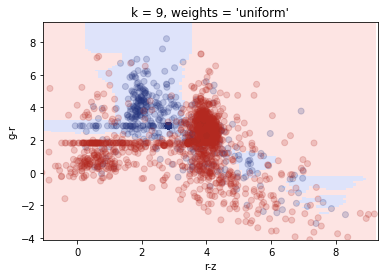

In [25]:
# g-r VS r-z

features1 = [X['r']-X['z'], X['g']-X['r']]
X1 = np.array(features1).transpose()
y1 = y
'''
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3,random_state=42)

grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

gs1 = GridSearchCV(neighbors.KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)
g_res1 = gs1.fit(X1_train, y1_train)

print('best score: ', g_res1.best_score_)
print('best params: ', g_res1.best_params_)
'''
filter1 = neighbors.KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='uniform')
get_color_filter(filter1, 9, 'uniform', X1, y1, qso_mag_r, qso_mag_z, qso_mag_g, qso_mag_r)
plt.xlabel('r-z')
plt.ylabel('g-r')
plt.show()

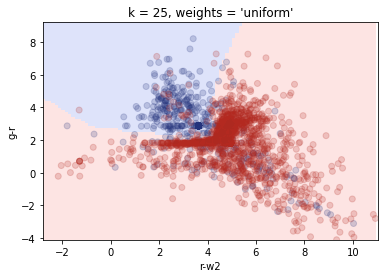

In [26]:
# g-r VS r-w2

features2 = [X['r']-X['w2'], X['g']-X['r']]
X2 = np.array(features2).transpose()
y2 = y
'''
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3,random_state=42)

grid_params = {'n_neighbors' : [5, 7, 9, 11, 13, 15, 20, 25, 30],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

gs2 = GridSearchCV(neighbors.KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)
g_res2 = gs2.fit(X2_train, y2_train)

print('best score: ', g_res2.best_score_)
print('best params: ', g_res2.best_params_)
'''
filter2 = neighbors.KNeighborsClassifier(metric='minkowski', n_neighbors=25, weights='uniform')
get_color_filter(filter2, 25, 'uniform', X2, y2, qso_mag_r, qso_mag_w2, qso_mag_g, qso_mag_r)
plt.xlabel('r-w2')
plt.ylabel('g-r')
plt.show()

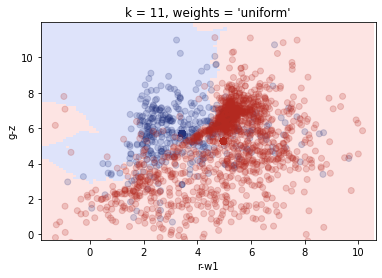

In [27]:
# g-z VS r-w1

features3 = [X['r']-X['w1'], X['g']-X['z']]
X3 = np.array(features3).transpose()
y3 = y
#print(y1[:5])
'''
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3,random_state=42)

grid_params = {'n_neighbors' : [5, 7, 9, 11, 13, 15, 20, 25],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

gs3 = GridSearchCV(neighbors.KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)
g_res3 = gs3.fit(X3_train, y3_train)

print('best score: ', g_res3.best_score_)
print('best params: ', g_res3.best_params_)
'''
filter3 = neighbors.KNeighborsClassifier(metric='minkowski', n_neighbors=11, weights='uniform')
get_color_filter(filter3, 11, 'uniform', X3, y3, qso_mag_r, qso_mag_w1, qso_mag_g, qso_mag_z)
plt.xlabel('r-w1')
plt.ylabel('g-z')
plt.show()

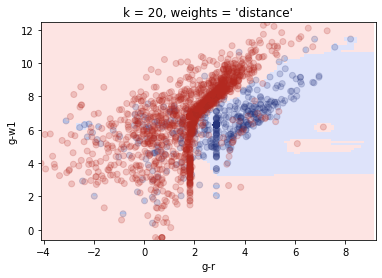

In [28]:
# g-w1 VS g-r

features4 = [X['g']-X['r'], X['g']-X['w1']]
X4 = np.array(features4).transpose()
y4 = y
'''
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3,random_state=42)

grid_params = {'n_neighbors' : [5, 7, 9, 11, 13, 15, 20, 25],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

gs4 = GridSearchCV(neighbors.KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)
g_res4 = gs4.fit(X4_train, y4_train)

print('best score: ', g_res4.best_score_)
print('best params: ', g_res4.best_params_)
'''
filter4 = neighbors.KNeighborsClassifier(metric='manhattan', n_neighbors=20, weights='distance')
get_color_filter(filter4, 20, 'distance', X4, y4, qso_mag_g, qso_mag_r, qso_mag_g, qso_mag_w1)
plt.xlabel('g-r')
plt.ylabel('g-w1')
plt.show()

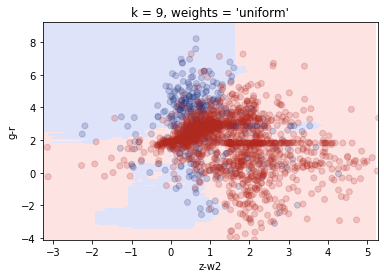

In [29]:
# g-r VS z-w2

features5 = [X['z']-X['w2'], X['g']-X['r']]
X5 = np.array(features5).transpose()
y5 = y
'''
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.3,random_state=42)

grid_params = {'n_neighbors' : [5, 7, 9, 11, 13, 15, 20, 25],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

gs5 = GridSearchCV(neighbors.KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)
g_res5 = gs5.fit(X5_train, y5_train)

print('best score: ', g_res5.best_score_)
print('best params: ', g_res5.best_params_)
'''
filter5 = neighbors.KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='uniform')
get_color_filter(filter5, 9, 'uniform', X5, y5, qso_mag_z, qso_mag_w2, qso_mag_g, qso_mag_r)
plt.xlabel('z-w2')
plt.ylabel('g-r')
plt.show()

In [30]:
#fraction
qso_copy = high_z.copy()
print(len(qso_copy))

qso_copy = qso_copy[qso_copy['ls_mag_g']-qso_copy['ls_mag_z'] > 4]

qso_copy = qso_copy[qso_copy['ls_mag_r']-qso_copy['mag_w1'] > 1.8]
qso_copy = qso_copy[qso_copy['ls_mag_r']-qso_copy['mag_w1'] < 3.]

qso_copy = qso_copy[qso_copy['ls_mag_r']-qso_copy['mag_w2'] > 1.7]
qso_copy = qso_copy[qso_copy['ls_mag_r']-qso_copy['mag_w2'] < 3.2]

qso_copy = qso_copy[qso_copy['ls_mag_z']-qso_copy['mag_w1'] > 0]
qso_copy = qso_copy[qso_copy['ls_mag_z']-qso_copy['mag_w1'] < 1]

qso_copy = qso_copy[qso_copy['ls_mag_z']-qso_copy['mag_w2'] < 1.]
qso_copy = qso_copy[qso_copy['ls_mag_z']-qso_copy['mag_w2'] < 0.]
print(len(qso_copy))

513
3


In [33]:
# check the fraction of known qso after they go through these filters
qso_copy = data_qso.copy()
print(len(qso_copy))

# g-r VS r-z
lab = filter1.predict(np.array([qso_copy['r']-qso_copy['z'], qso_copy['g']-qso_copy['r']]).transpose())
qso_copy['label'] = lab
qso_copy = qso_copy[qso_copy['label'] == 1]

# g-r VS r-w2
lab = filter2.predict(np.array([qso_copy['r']-qso_copy['w2'], qso_copy['g']-qso_copy['r']]).transpose())
qso_copy['label'] = lab
qso_copy = qso_copy[qso_copy['label'] == 1]

# g-z VS r-w1
lab = filter3.predict(np.array([qso_copy['r']-qso_copy['w1'], qso_copy['g']-qso_copy['z']]).transpose())
qso_copy['label'] = lab
qso_copy = qso_copy[qso_copy['label'] == 1]

# g-w1 VS g-r
lab = filter4.predict(np.array([qso_copy['g']-qso_copy['r'], qso_copy['g']-qso_copy['w1']]).transpose())
qso_copy['label'] = lab
qso_copy = qso_copy[qso_copy['label'] == 1]

'''
# g-r VS z-w2
lab = filter4.predict(np.array([qso_copy['z']-qso_copy['w2'], qso_copy['g']-qso_copy['r']]).transpose())
qso_copy['label'] = lab
qso_copy = qso_copy[qso_copy['label'] == 1]
'''
print(len(qso_copy))

513
308


### SVM ANOVA to select features with intercorrelations: https://scikit-learn.org/stable/auto_examples/svm/plot_svm_anova.html

In [35]:
col_names = ['g', 'r', 'z', 'w1', 'w2']
for i in range(len(col_names)):
    for j in range(len(col_names)):
        if i < j:
            col = col_names[i] + '-' + col_names[j]
            X[col] = X[col_names[i]] - X[col_names[j]]
print(X.columns, len(X.columns))
print(type(X))

Index(['g', 'r', 'z', 'w1', 'w2', 'g-r', 'g-z', 'g-w1', 'g-w2', 'r-z', 'r-w1',
       'r-w2', 'z-w1', 'z-w2', 'w1-w2'],
      dtype='object') 15
<class 'pandas.core.frame.DataFrame'>


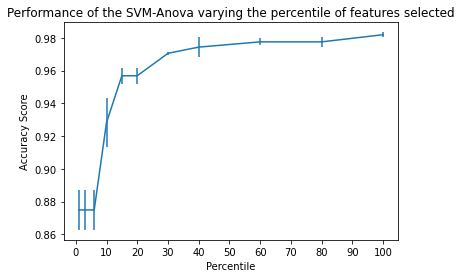

In [36]:
clf_svm = Pipeline(
    [
        ("anova", SelectPercentile(chi2)),
        ("scaler", StandardScaler()),
        ("svc", svm.SVC(gamma="auto")),
    ]
)

# #############################################################################
# Plot the cross-validation score as a function of percentile of features
score_means = list()
score_stds = list()
percentiles = (1, 3, 6, 10, 15, 20, 30, 40, 60, 80, 100)

for percentile in percentiles:
    clf_svm.set_params(anova__percentile=percentile)
    this_scores = cross_val_score(clf_svm, abs(X), y)
    score_means.append(this_scores.mean())
    score_stds.append(this_scores.std())

plt.errorbar(percentiles, score_means, np.array(score_stds))
plt.title("Performance of the SVM-Anova varying the percentile of features selected")
plt.xticks(np.linspace(0, 100, 11, endpoint=True))
plt.xlabel("Percentile")
plt.ylabel("Accuracy Score")
plt.axis("tight")
plt.show()

indicating 6 or more of the features, but not 100%

### linear SVC 

### https://github.com/pierpaolo28/Companies-Data-Science-Challenges/blob/master/Microsoft%20Workshop%20-%20Deep%20Learning%20Data%20Analysis%20in%20Azure.ipynb

/data0/sw/antares-kernel-0.4/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


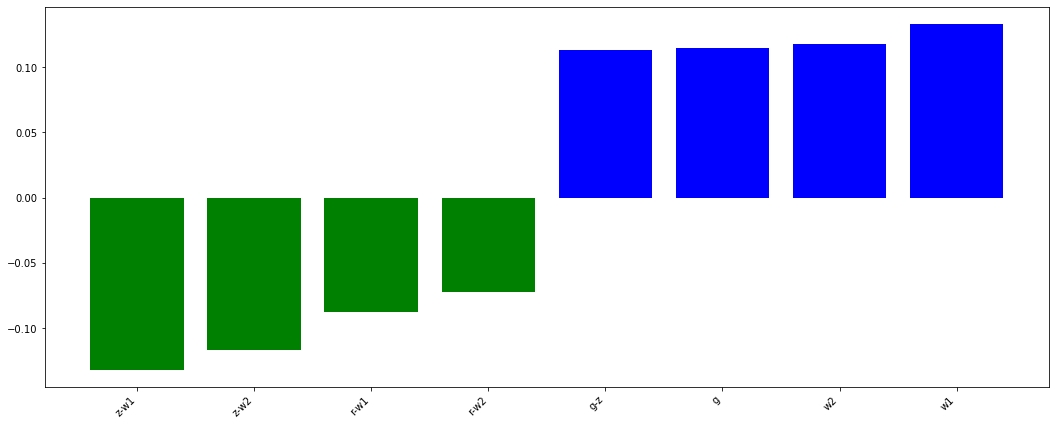

In [37]:
trainedsvm = svm.LinearSVC(max_iter = 2000).fit(X, y)
coef = trainedsvm.coef_.ravel()

top_positive_coefficients = np.argsort(coef)[-4:]
top_negative_coefficients = np.argsort(coef)[:4]
top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
plt.figure(figsize=(18, 7))
colors = ['green' if c < 0 else 'blue' for c in coef[top_coefficients]]
plt.bar(np.arange(2 * 4), coef[top_coefficients], color=colors)
feature_names = np.array(X.columns)
plt.xticks(np.arange(2 * 4), feature_names[top_coefficients], rotation=45, ha='right')
plt.show()

keep g-r, g-z, r-w1, r-w2, z-w1, z-w2

In [38]:
# check if the dataframes look reasonable
keep_added_cols = ['g-r', 'g-z', 'r-w1', 'r-w2', 'z-w1', 'z-w2']
X = X[['g', 'r', 'z', 'w1', 'w2', 'g-r', 'g-z', 'r-w1', 'r-w2', 'z-w1', 'z-w2']]

print(type(X))
print('X: \n', X.head())
print(X.tail(5))
print('y: \n', y.head())
print(y.tail(5))

<class 'pandas.core.frame.DataFrame'>
X: 
            g          r        z       w1         w2       g-r       g-z  \
0  26.332592  22.368400  19.5257  18.9833  18.738400  3.964192  6.806892   
1  26.332592  23.461607  23.3734  24.2825  19.832963  2.870985  2.959192   
2  26.332592  23.461607  23.3167  21.9000  22.781300  2.870985  3.015892   
3  26.950100  22.327300  19.2734  18.9540  18.726100  4.622800  7.676700   
4  27.398700  23.461607  22.6921  21.1896  22.345800  3.937093  4.706600   

       r-w1      r-w2    z-w1      z-w2  
0  3.385100  3.630000  0.5424  0.787300  
1 -0.820893  3.628645 -0.9091  3.540437  
2  1.561607  0.680307  1.4167  0.535400  
3  3.373300  3.601200  0.3194  0.547300  
4  2.272007  1.115807  1.5025  0.346300  
              g          r          z         w1         w2       g-r  \
3423  29.386300  23.869700  19.932800  18.097500  18.407800  5.516600   
3424  24.154600  24.089700  24.159300  16.033700  16.061400  0.064900   
3425  24.356734  24.519000  1

# Training - RF

In [39]:
# convert to pure numbers
X = X.to_numpy()
y = np.array(y, dtype=int)
print(type(X))

<class 'numpy.ndarray'>


In [40]:
print(X[0, :])

[26.33259219 22.3684     19.5257     18.9833     18.7384      3.96419219
  6.80689219  3.3851      3.63        0.5424      0.7873    ]


In [28]:
estimators = []
f1_lst_n = []
train_score_n = []
test_score_n = []

for n_estimator in range(100, 400, 10):
    model = RandomForestClassifier(n_estimators=n_estimator, random_state=42)
    kf = KFold(n_splits=10, random_state=42, shuffle=True)
    f1_sum = 0
    train_score_sum = 0
    test_score_sum = 0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        f1 = f1_score(y_test, y_pred)
        f1_sum += f1
        train_score  = model.score(X_train,y_train) # mean accuracy
        train_score_sum += train_score
        test_score = model.score(X_test,y_test)
        test_score_sum += test_score
    f1_ave = f1_sum/10 
    train_score_ave = train_score_sum/10
    test_score_ave = test_score_sum/10
    estimators.append(n_estimator)
    f1_lst_n.append(f1_ave)
    train_score_n.append(train_score_ave)
    test_score_n.append(test_score_ave)

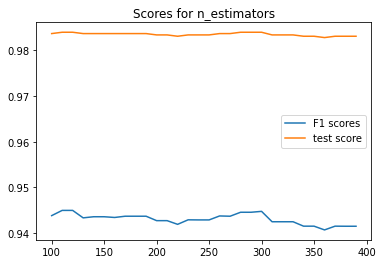

In [29]:
plt.plot(estimators, f1_lst_n, label='F1 scores')
#plt.plot(estimators, train_score_n, label='train scores')
plt.plot(estimators, test_score_n, label='test score')
plt.title('Scores for n_estimators')
plt.legend()
plt.show()

In [31]:
# get the top 10 n_estimators with the highest F1 scores
df_n = pd.DataFrame({'n_estimator': estimators, 'F1 score': f1_lst_n})
df_n = df_n.sort_values(by='F1 score', ascending=False)
print(df_n.head(20))

    n_estimator  F1 score
2           120  0.944983
1           110  0.944983
20          300  0.944772
19          290  0.944575
18          280  0.944575
0           100  0.943839
16          260  0.943767
7           170  0.943707
8           180  0.943707
9           190  0.943707
17          270  0.943707
4           140  0.943594
5           150  0.943594
6           160  0.943436
3           130  0.943351
13          230  0.942921
15          250  0.942899
14          240  0.942899
11          210  0.942740
10          200  0.942740


In [33]:
# plot (x: max_depth value, y: score)
depths = []
f1_lst_depth = []
train_score_depth = []
test_score_depth = []

for max_depth_value in range(2,35):
    model = RandomForestClassifier(n_estimators=120, max_depth=max_depth_value, random_state=42)
    kf = KFold(n_splits=10, random_state=42, shuffle=True)
    f1_sum = 0
    train_score_sum = 0
    test_score_sum = 0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        f1 = f1_score(y_test, y_pred)
        f1_sum += f1
        train_score  = model.score(X_train,y_train)
        train_score_sum += train_score
        test_score = model.score(X_test,y_test)
        test_score_sum += test_score
    f1_ave = f1_sum/10 
    train_score_ave = train_score_sum/10
    test_score_ave = test_score_sum/10
    depths.append(max_depth_value)
    f1_lst_depth.append(f1_ave)
    train_score_depth.append(train_score_ave)
    test_score_depth.append(test_score_ave)

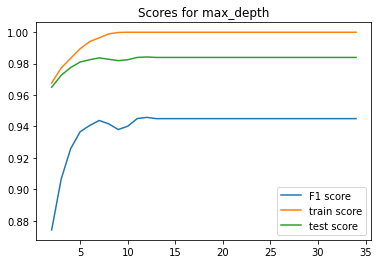

In [34]:
plt.plot(depths, f1_lst_depth, label='F1 score')
plt.plot(depths, train_score_depth, label='train score')
plt.plot(depths, test_score_depth, label='test score')
plt.title('Scores for max_depth')
plt.legend()
plt.show()

In [35]:
# get the top 10 max_depth with the highest F1 scores
df_depth = pd.DataFrame({'max_depth': depths, 'F1 score': f1_lst_depth})
df_depth = df_depth.sort_values(by='F1 score', ascending=False)
print(df_depth.head(30))

    max_depth  F1 score
10         12  0.945779
9          11  0.945032
16         18  0.944983
20         22  0.944983
21         23  0.944983
22         24  0.944983
23         25  0.944983
24         26  0.944983
25         27  0.944983
18         20  0.944983
26         28  0.944983
27         29  0.944983
28         30  0.944983
29         31  0.944983
30         32  0.944983
31         33  0.944983
19         21  0.944983
32         34  0.944983
17         19  0.944983
15         17  0.944983
14         16  0.944983
13         15  0.944983
12         14  0.944983
11         13  0.944983
5           7  0.943812
6           8  0.941651
4           6  0.940623
8          10  0.940160
7           9  0.938050
3           5  0.936672


In [36]:
leaves = []
f1_lst_leaf = []
train_score_leaf = []
test_score_leaf = []

for min_leaf in range(2,30):
    model = RandomForestClassifier(n_estimators=120, max_depth=12, min_samples_leaf=min_leaf, random_state=42)
    kf = KFold(n_splits=10, random_state=42, shuffle=True)
    f1_sum = 0
    train_score_sum = 0
    test_score_sum = 0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        f1 = f1_score(y_test, y_pred)
        f1_sum += f1
        train_score  = model.score(X_train,y_train)
        train_score_sum += train_score
        test_score = model.score(X_test,y_test)
        test_score_sum += test_score
    f1_ave = f1_sum/10 
    train_score_ave = train_score_sum/10
    test_score_ave = test_score_sum/10
    leaves.append(min_leaf)
    f1_lst_leaf.append(f1_ave)
    train_score_leaf.append(train_score_ave)
    test_score_leaf.append(test_score_ave)

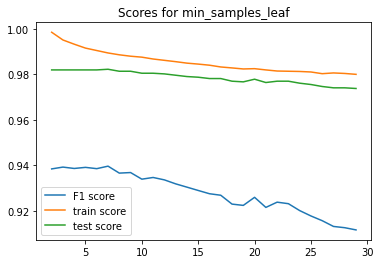

In [37]:
plt.plot(leaves, f1_lst_leaf, label='F1 score')
plt.plot(leaves, train_score_leaf, label='train score')
plt.plot(leaves, test_score_leaf, label='test score')
plt.title('Scores for min_samples_leaf')
plt.legend()
plt.show()

In [38]:
# get the top 10 min_samples_leaf with the highest F1 scores
df_leaf = pd.DataFrame({'min_samples_leaf': leaves, 'F1 score': f1_lst_leaf})
df_leaf = df_leaf.sort_values(by='F1 score', ascending=False)
print(df_leaf.head(10))

   min_samples_leaf  F1 score
5                 7  0.939606
1                 3  0.939193
3                 5  0.939075
2                 4  0.938591
4                 6  0.938503
0                 2  0.938396
7                 9  0.936793
6                 8  0.936548
9                11  0.934629
8                10  0.933887


In [39]:
splits = []
f1_lst_split = []
train_score_split = []
test_score_split = []

for min_split in range(2,35):
    model = RandomForestClassifier(n_estimators=120, max_depth=12, min_samples_leaf=7, min_samples_split=min_split, random_state=42)
    kf = KFold(n_splits=10, random_state=42, shuffle=True)
    f1_sum = 0
    train_score_sum = 0
    test_score_sum = 0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        f1 = f1_score(y_test, y_pred)
        f1_sum += f1
        train_score  = model.score(X_train,y_train)
        train_score_sum += train_score
        test_score = model.score(X_test,y_test)
        test_score_sum += test_score
    f1_ave = f1_sum/10 
    train_score_ave = train_score_sum/10
    test_score_ave = test_score_sum/10
    splits.append(min_split)
    f1_lst_split.append(f1_ave)
    train_score_split.append(train_score_ave)
    test_score_split.append(test_score_ave)

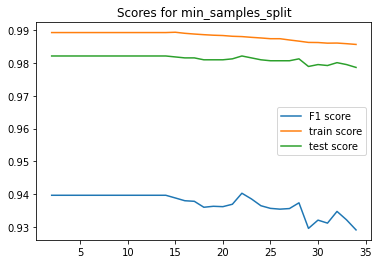

In [40]:
plt.plot(splits, f1_lst_split, label='F1 score')
plt.plot(splits, train_score_split, label='train score')
plt.plot(splits, test_score_split, label='test score')
plt.title('Scores for min_samples_split')
plt.legend()
plt.show()

In [42]:
# get the top 10 min_samples_split with the highest F1 scores
df_split = pd.DataFrame({'min_samples_split': splits, 'F1 score': f1_lst_split})
df_split = df_split.sort_values(by='F1 score', ascending=False)
print(df_split.head(11))

    min_samples_split  F1 score
20                 22  0.940228
0                   2  0.939606
8                  10  0.939606
1                   3  0.939606
12                 14  0.939606
10                 12  0.939606
9                  11  0.939606
11                 13  0.939606
7                   9  0.939606
6                   8  0.939606
5                   7  0.939606


In [41]:
# use GridSearch for a more targeted training
# get the sample size with replacement

# training using GridSearch
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, shuffle=True, random_state=42)


# check if there is any nan/inf
print(np.where(np.isnan(X_train)), np.where(np.isnan(X_test)), np.where(np.isnan(y_train)), np.where(np.isnan(y_test)))
print(np.where(np.isinf(X_train)), np.where(np.isinf(X_test)), np.where(np.isinf(y_train)), np.where(np.isinf(y_test)))


model_params = {'n_estimators': [120, 300, 280, 100, 260, 180, 140, 160, 130, 230],
                'max_features': ['auto', 'sqrt', 'log2'],
                'min_samples_split': [2, 10, 3, 14, 12, 11, 13, 9, 8, 7],
                'min_samples_leaf': [7, 3, 5, 4, 6, 2, 9, 8, 11, 10],
                'max_depth': [12, 11, 13, 7, 8, 6, 10, 9, 5]} # try to constrain the max_depth in [5, 15] https://stats.stackexchange.com/questions/111968/random-forest-how-to-handle-overfitting

# class_weight? like certain color ratios are more important than others?
# oob_score = True

clf = RandomForestClassifier(random_state=42)

rf = RandomizedSearchCV(estimator = clf, param_distributions = model_params, n_iter = 100, cv = 5, scoring='f1_macro', refit= 'f1_macro', verbose=1, random_state=42, n_jobs = -1)

rf.fit(X_train, y_train)

print('best params:\n ')
print(rf.best_params_)

(array([], dtype=int64), array([], dtype=int64)) (array([], dtype=int64), array([], dtype=int64)) (array([], dtype=int64),) (array([], dtype=int64),)
(array([], dtype=int64), array([], dtype=int64)) (array([], dtype=int64), array([], dtype=int64)) (array([], dtype=int64),) (array([], dtype=int64),)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
best params:
 
{'n_estimators': 180, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 12}


In [42]:
# get some training scores

print('best score: \n ')
print(rf.best_score_)

print('results:\n ')
print(pd.DataFrame(rf.cv_results_))

y_train_pred = rf.predict(X_train)
y_pred = rf.predict(X_test)

#classification report -> overfitting Y/N
report_train = classification_report(y_train, y_train_pred)
report_test = classification_report(y_test, y_pred)
print("Classification report (training): \n", report_train)
print("Classification report (test): \n", report_test)

best score: 
 
0.9648910441597927
results:
 
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        1.078739      0.008853         0.059197        0.002519   
1        0.752375      0.004537         0.044604        0.000760   
2        0.493544      0.002596         0.028479        0.003041   
3        0.513513      0.004383         0.032726        0.001936   
4        0.780097      0.005827         0.043804        0.001303   
..            ...           ...              ...             ...   
95       0.409313      0.003455         0.023918        0.000321   
96       0.554924      0.009557         0.026289        0.005492   
97       0.521792      0.009308         0.021338        0.000848   
98       0.408650      0.022372         0.016395        0.000383   
99       0.642589      0.021109         0.029991        0.005596   

   param_n_estimators param_min_samples_split param_min_samples_leaf  \
0                 260                      11                     

best_params:

'auto' ≈ 'sqrt'

The fixed one -> {'n_estimators': 210, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 15} 

score=0.9035127519347033

After modification of NaN (replace with 0):
best params: {'n_estimators': 180, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 12} 

score=0.8328713892441162

After modificaiton of NaN (replace with mean):
{'n_estimators': 210, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 6}
score=0.9504852329649328

Adding features from SVM:
{'n_estimators': 180, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 12}

# Prediction

## Retrieve data from ls_dr9

with the g-r>1.8 criteria

SELECT ra, dec, ls_id, mag_g, mag_r, mag_z, mag_w1, mag_w2, g_r, snr_g, snr_r, snr_z, snr_w1, snr_w2
        FROM   ls_dr9.tractor_n
        WHERE  (dered_mag_z > 16.0 and dered_mag_z < 23.0 and mag_w1 != 'NaN' and mag_w2 != 'NaN' and g_r> 1.8
               and mag_w1 != 'Infinity' and mag_w2 != 'Infinity' and mag_g != 'Infinity' and mag_r != 'Infinity' and shape_r < 1.0 and snr_g < 3.0
               and snr_w1 > 3.0 and dered_mag_g > 24.0 or dered_flux_g < 0.0 and dec > 15.0)
        LIMIT 100000
        
dered_mag_z > 16.0 and dered_mag_z < 23.0 and g_r> 1.8 and shape_r < 1.0 and snr_g < 3.0
               and snr_w1 > 3.0 and dered_mag_g > 24.0 or dered_flux_g < 0.0 and 

In [43]:
%%time

aquery = """
        SELECT ra, dec, ls_id, mag_g, mag_r, mag_z, mag_w1, mag_w2, g_r, snr_g, snr_r, snr_z, snr_w1, snr_w2
        FROM   ls_dr9.tractor_n
        WHERE  (dec > 15.0 and dec < 40.0 and ra > 210.0 and ra < 240.0 and dered_mag_z > 16.0 and dered_mag_z < 23.0 and g_r> 1.8 and shape_r < 1.0 and (dered_mag_g > 24.0 or dered_flux_g < 0.0) 
                and snr_g < 3.0 and snr_w1 > 3.0 and mag_w1 != 'NaN' and mag_w2 != 'NaN' and mag_w1 != 'Infinity' and mag_w2 != 'Infinity' and mag_g != 'Infinity' and mag_r != 'Infinity')
        """
### ls_dr8.tractor is the main catalog combining both north and south

### async mode returns jobid
jobid = qc.query(token, sql=aquery, fmt='csv', async_=True, timeout=3600, out='vos://LS_DR9N_part1.csv')
status = ''
while (status != 'COMPLETED' and status != 'ERROR'):
    status = qc.status(token,jobid)
    print(status)
    time.sleep(2)

print ('error message ', qc.error(token,jobid)) 

response=qc.results(token,jobid)
#df = qc.query(sql=aquery, fmt='pandas')
res = qc.query(sql=aquery, fmt='csv', out='vos://my_file_rf_mag.csv')

EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
EXECUTING
COMPLETED
error message  Error: list index out of range
CPU times: user 2.91 s, sys: 914 ms, total: 3.83 s
Wall time: 5min 33s


keep_added_cols = ['g-r', 'g-z', 'r-w1', 'r-w2', 'z-w1', 'z-w2']

add signal-to-noise ratio: snr_g   Signal-to-Noise ratio in g

In [44]:
data = sc.get('vos://my_file_rf_mag.csv') 
data = convert(data)
print(len(data))
print('Before modification: \n', data.head())
data = data.replace([np.inf, -np.inf], np.nan)
#data = data.dropna(axis='index').reset_index(drop=True)
columns = ['mag_g', 'mag_r', 'mag_z', 'mag_w1', 'mag_w2', 'g_r', 'snr_g', 'snr_r', 'snr_z', 'snr_w1', 'snr_w2']
data_replace = {}
for col in columns:
    data[col] = data[col].replace([np.nan], round(data[col].mean(), 6))
    data_replace[col] = round(data[col].mean(), 6)

snr = data[['ls_id', 'snr_g', 'snr_r', 'snr_z', 'snr_w1', 'snr_w2']]
#data = data.drop(columns=['snr_g', 'snr_r', 'snr_z', 'snr_w1', 'snr_w2'], axis=1)

data['g-z'] = data['mag_g'] - data['mag_z']
data['r-w1'] = data['mag_r'] - data['mag_w1']
data['r-w2'] = data['mag_r'] - data['mag_w2']
data['z-w1'] = data['mag_z'] - data['mag_w1']
data['z-w2'] = data['mag_z'] - data['mag_w2']

print(data.columns)
#print(len(data))
print('After modificaiton: \n', data.head())
# print(type(data['mag_r'][0]))

570180
Before modification: 
            ra        dec             ls_id      mag_g      mag_r      mag_z  \
0  236.998649  39.989934  9907734910992898  26.024767  22.728334  21.215046   
1  236.931743  39.996128  9907734910930646  26.197275  23.695051  20.716366   
2  236.928356  39.997470  9907734910930611  24.937008  23.117184  21.523066   
3  236.929452  39.975666  9907734910930625  24.743868  22.886774  21.852163   
4  236.932113  39.994171  9907734910930649  28.849516  23.903748  21.585957   

      mag_w1     mag_w2       g_r     snr_g     snr_r      snr_z     snr_w1  \
0  19.577868  20.242218  3.296432  0.628076  8.773003  34.296894  27.211966   
1  20.813549  21.254358  2.502224  0.670083  3.632156  50.640087  11.301957   
2  21.932200  21.798086  1.819824  2.132136  6.115084  25.077795   4.113348   
3  20.541700  20.839264  1.857094  2.893340  8.162531  13.142480  14.239944   
4  19.980005  20.536140  4.945768  0.056408  2.891031  21.510197  23.360252   

     snr_w2  
0  8.6

In [45]:
print('The replacement values: \n', data_replace)
print(np.where(np.isinf(data)))

The replacement values: 
 {'mag_g': 26.132695, 'mag_r': 23.827642, 'mag_z': 22.026713, 'mag_w1': 20.408007, 'mag_w2': 20.930978, 'g_r': 2.542303, 'snr_g': 0.657045, 'snr_r': 4.538273, 'snr_z': 17.790373, 'snr_w1': 18.61086, 'snr_w2': 6.960281}
(array([], dtype=int64), array([], dtype=int64))


In [46]:
df = data.copy(deep=True)
print(df.head())

           ra        dec             ls_id      mag_g      mag_r      mag_z  \
0  236.998649  39.989934  9907734910992898  26.024767  22.728334  21.215046   
1  236.931743  39.996128  9907734910930646  26.197275  23.695051  20.716366   
2  236.928356  39.997470  9907734910930611  24.937008  23.117184  21.523066   
3  236.929452  39.975666  9907734910930625  24.743868  22.886774  21.852163   
4  236.932113  39.994171  9907734910930649  28.849516  23.903748  21.585957   

      mag_w1     mag_w2       g_r     snr_g     snr_r      snr_z     snr_w1  \
0  19.577868  20.242218  3.296432  0.628076  8.773003  34.296894  27.211966   
1  20.813549  21.254358  2.502224  0.670083  3.632156  50.640087  11.301957   
2  21.932200  21.798086  1.819824  2.132136  6.115084  25.077795   4.113348   
3  20.541700  20.839264  1.857094  2.893340  8.162531  13.142480  14.239944   
4  19.980005  20.536140  4.945768  0.056408  2.891031  21.510197  23.360252   

     snr_w2       g-z      r-w1      r-w2      z-w

In [60]:
# data from the new, unknown classification data set (ls_9)
ls_id = data['ls_id']
mag_g = data['mag_g']
mag_r = data['mag_r']
mag_z = data['mag_z']
mag_w1 = data['mag_w1']
mag_w2 = data['mag_w2']

gz = mag_g/mag_z
gw1 = mag_g/mag_w1
gw2 = mag_g/mag_w2
rz = mag_r/mag_z
rw1 = mag_r/mag_w1
rw2 = mag_r/mag_w2

print(gz.head())

0    1.226713
1    1.264569
2    1.158618
3    1.132330
4    1.336495
dtype: float64


roughly 

g-r:>2

g-z:>4 

r-w1: 1.8-3

r-w2:1.7-3.2

z-w1, z-w2: 0-1

## apply filters to unknown data

signal-to-noise ratio filter:

snr_g < 3.0

snr_r < 5.0

snr_w1 > 5.0

In [47]:
# S/N(g) < 3.
df = df[df['snr_g'] < 3.0]

# S/N(r) < 5.
df = df[df['snr_r'] < 5.0]

#S/N(w1) > 5
df = df[df['snr_w1'] > 5.0]

print(len(df))
df = df.drop(columns=['ra', 'dec', 'snr_g', 'snr_r', 'snr_z', 'snr_w1', 'snr_w2'], axis=1)
print(df.head())

330117
              ls_id      mag_g      mag_r      mag_z     mag_w1     mag_w2  \
1  9907734910930646  26.197275  23.695051  20.716366  20.813549  21.254358   
4  9907734910930649  28.849516  23.903748  21.585957  19.980005  20.536140   
5  9907734910929875  26.132695  23.665237  21.882227  20.734383  20.654617   
6  9907734910930320  26.249653  23.771696  21.821125  20.297028  20.546368   
8  9907734910930064  26.881596  24.385933  22.735798  20.419062  20.307217   

        g_r       g-z      r-w1      r-w2      z-w1      z-w2  
1  2.502224  5.480909  2.881502  2.440693 -0.097183 -0.537992  
4  4.945768  7.263559  3.923743  3.367608  1.605952  1.049817  
5  2.542303  4.250468  2.930854  3.010620  1.147844  1.227610  
6  2.477957  4.428528  3.474668  3.225328  1.524097  1.274757  
8  2.495663  4.145798  3.966871  4.078716  2.316736  2.428581  


In [48]:
# remove dtype=float
# X_data = pd.DataFrame({'ls_id': ls_id, 'mag_g': mag_g, 'mag_r': mag_r, 'mag_z': mag_z, 'mag_w1': mag_w1, 'mag_w2': mag_w2})
#X_new = X_data[['mag_g', 'mag_r', 'mag_z', 'mag_w1', 'mag_w2']]
if 'label' in df.columns:
    df = df.drop(columns=['label'])
X_new = df.drop(columns=['ls_id'])
print(X_new.head(), '\n', len(X_new))
X_new = X_new.to_numpy()
#print(X_new[5, ])
print(np.where(np.isinf(X_new)), np.where(np.isnan(X_new)))

       mag_g      mag_r      mag_z     mag_w1     mag_w2       g_r       g-z  \
1  26.197275  23.695051  20.716366  20.813549  21.254358  2.502224  5.480909   
4  28.849516  23.903748  21.585957  19.980005  20.536140  4.945768  7.263559   
5  26.132695  23.665237  21.882227  20.734383  20.654617  2.542303  4.250468   
6  26.249653  23.771696  21.821125  20.297028  20.546368  2.477957  4.428528   
8  26.881596  24.385933  22.735798  20.419062  20.307217  2.495663  4.145798   

       r-w1      r-w2      z-w1      z-w2  
1  2.881502  2.440693 -0.097183 -0.537992  
4  3.923743  3.367608  1.605952  1.049817  
5  2.930854  3.010620  1.147844  1.227610  
6  3.474668  3.225328  1.524097  1.274757  
8  3.966871  4.078716  2.316736  2.428581   
 330117
(array([], dtype=int64), array([], dtype=int64)) (array([], dtype=int64), array([], dtype=int64))


In [49]:
clf_mag = RandomForestClassifier(n_estimators=180, min_samples_split=8, min_samples_leaf=2, max_features='sqrt', max_depth=12)

In [50]:
clf_mag.fit(X_train, y_train) # X, y from training sample
# predict the unknown data retrieved from ls
y_new = clf_mag.predict(X_new) 

results = df.loc[y_new == 1, 'ls_id']

print(len(results))
print(results.head())

# get the ls_id corresponding to the predicted results
df['label'] = y_new

# predict a 2nd round
X_second = df[df['label'] == 1]
print(X_second.head())

y_second = clf_mag.predict(X_second.drop(columns=['label', 'ls_id']).to_numpy())
df = X_second

results = df.loc[y_second == 1, 'ls_id']
print(results.head())

print(len(results))

194008
1    9907734910930646
4    9907734910930649
5    9907734910929875
6    9907734910930320
8    9907734910930064
Name: ls_id, dtype: int64
              ls_id      mag_g      mag_r      mag_z     mag_w1     mag_w2  \
1  9907734910930646  26.197275  23.695051  20.716366  20.813549  21.254358   
4  9907734910930649  28.849516  23.903748  21.585957  19.980005  20.536140   
5  9907734910929875  26.132695  23.665237  21.882227  20.734383  20.654617   
6  9907734910930320  26.249653  23.771696  21.821125  20.297028  20.546368   
8  9907734910930064  26.881596  24.385933  22.735798  20.419062  20.307217   

        g_r       g-z      r-w1      r-w2      z-w1      z-w2  label  
1  2.502224  5.480909  2.881502  2.440693 -0.097183 -0.537992      1  
4  4.945768  7.263559  3.923743  3.367608  1.605952  1.049817      1  
5  2.542303  4.250468  2.930854  3.010620  1.147844  1.227610      1  
6  2.477957  4.428528  3.474668  3.225328  1.524097  1.274757      1  
8  2.495663  4.145798  3.966871  

## KNN color filters

g-r VS r-z

g-r VS r-w2

g-z VS r-w1

g-w1 VS g-r

(g-r VS z-w2)

In [51]:
# g-r VS r-z
labels = filter1.predict(np.array([df['mag_r']-df['mag_z'], df['g_r']]).transpose())

df['label'] = labels
df = df[df['label'] == 1]
print(len(df))

# g-r VS r-w2
labels = filter2.predict(np.array([df['r-w2'], df['g_r']]).transpose())

df['label'] = labels
df = df[df['label'] == 1]
print(len(df))

# g-z VS r-w1
labels = filter3.predict(np.array([df['r-w1'], df['g-z']]).transpose())

df['label'] = labels
df = df[df['label'] == 1]
labels = df['label']
print(len(df))

# g-w1 VS g-r
labels = filter4.predict(np.array([df['g_r'], df['mag_g']-df['mag_w1']]).transpose())

df['label'] = labels
df = df[df['label'] == 1]
labels = df['label']
print(len(df))

'''
#g-r VS z-w2
labels = filter5.predict(np.array([df['z-w2'], df['g_r']]).transpose())

df['label'] = labels
df = df[df['label'] == 1]
labels = df['label']
print(len(df))
'''

155462


/data0/sw/antares-kernel-0.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


133444
38929
36023


"\n#g-r VS z-w2\nlabels = filter5.predict(np.array([df['z-w2'], df['g_r']]).transpose())\n\ndf['label'] = labels\ndf = df[df['label'] == 1]\nlabels = df['label']\nprint(len(df))\n"

In [52]:
df = data[data['ls_id'].isin(df['ls_id'])]
df['label'] = labels
print(df.head(), '\n', len(df))

            ra        dec             ls_id      mag_g      mag_r      mag_z  \
4   236.932113  39.994171  9907734910930649  28.849516  23.903748  21.585957   
15  236.834240  39.932585  9907734910929409  28.192200  24.538671  22.734945   
21  236.765276  39.994661  9907734910928659  30.374832  23.485102  21.856459   
34  236.722183  39.965083  9907734910928117  27.540140  23.673788  22.012270   
37  236.720573  39.984239  9907734910928097  26.826468  23.854496  21.689922   

       mag_w1     mag_w2       g_r     snr_g     snr_r      snr_z     snr_w1  \
4   19.980005  20.536140  4.945768  0.056408  2.891031  21.510197  23.360252   
15  21.237220  22.937584  3.653528  0.129843  2.167374   9.311295   7.681507   
21  20.163828  20.376509  6.889730  0.013602  3.873549  12.884311  19.521372   
34  20.700829  21.371555  3.866352  0.256449  4.520183  18.212715  12.407414   
37  19.852308  19.917800  2.971972  0.495646  3.860815  24.560247  26.199335   

       snr_w2       g-z      r-w1     

/data0/sw/antares-kernel-0.4/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### color filters

In [65]:
df = df[df['g-z'] > 4]
print(len(df))

df = df[df['r-w1'] > 1.8]
df = df[df['r-w1'] < 3.]  
print(len(df))

df = df[df['r-w2'] > 1.7]
df = df[df['r-w2'] < 3.2]  
print(len(df))

df = df[df['z-w1'] > 0]
df = df[df['z-w1'] < 1]  
print(len(df))

df = df[df['z-w2'] > 0]
df = df[df['z-w2'] < 1]  
print(len(df))

39464
5802
3882
991
632


color cutout:
    
w1-w2 > 0.5

reject z > 23.3

In [53]:
# The typical W1 − W2 cut used for quasar selection is W1 − W2 > 0.5  Exploring Reionizaiton Quasars IV
df = df[(df['mag_w1'] - df['mag_w2']) > 0.5]
print(len(df))

# reject z > 23.3
df = df[df['mag_z'] <= 23.3]
print(len(df))

613
613


### extracting and re-formatting results

In [54]:
results = df.loc[df['label'] == 1, 'ls_id']
print(results.head())
print(type(results))
print(data.head())  
output = data[data['ls_id'].isin(results.values)].reset_index(drop=True)
output = output.set_index('ls_id')
print(output.head())
print(type(output))
print(len(output))

180     9907734910861893
3033    9907734691842630
3754    9907734910403323
3788    9907734910340285
4049    9907734837725363
Name: ls_id, dtype: int64
<class 'pandas.core.series.Series'>
           ra        dec             ls_id      mag_g      mag_r      mag_z  \
0  236.998649  39.989934  9907734910992898  26.024767  22.728334  21.215046   
1  236.931743  39.996128  9907734910930646  26.197275  23.695051  20.716366   
2  236.928356  39.997470  9907734910930611  24.937008  23.117184  21.523066   
3  236.929452  39.975666  9907734910930625  24.743868  22.886774  21.852163   
4  236.932113  39.994171  9907734910930649  28.849516  23.903748  21.585957   

      mag_w1     mag_w2       g_r     snr_g     snr_r      snr_z     snr_w1  \
0  19.577868  20.242218  3.296432  0.628076  8.773003  34.296894  27.211966   
1  20.813549  21.254358  2.502224  0.670083  3.632156  50.640087  11.301957   
2  21.932200  21.798086  1.819824  2.132136  6.115084  25.077795   4.113348   
3  20.541700  20.83926

### the color-color plots of the output

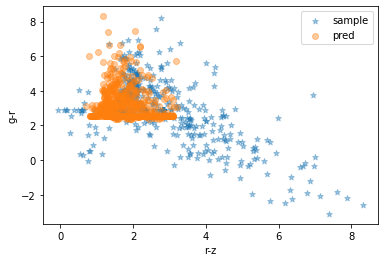

In [55]:
# g-r VS r-z
plt.scatter(qso_mag_r-qso_mag_z, qso_mag_g - qso_mag_r, marker='*', alpha=0.4, label='sample')
plt.scatter(output['mag_r'] - output['mag_z'], output['g_r'], marker='o', alpha=0.4, label='pred')
plt.xlabel('r-z')
plt.ylabel('g-r')
plt.legend()
plt.show()

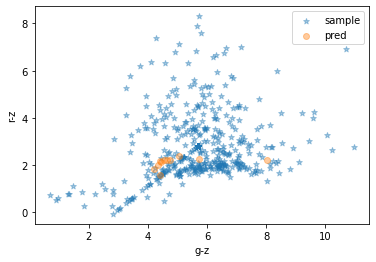

In [69]:
# r-z VS g-z
plt.scatter(qso_mag_g-qso_mag_z, qso_mag_r - qso_mag_z, marker='*', alpha=0.4, label='sample')
plt.scatter(output['g-z'], output['mag_r']-output['mag_z'], marker='o', alpha=0.4, label='pred')
plt.xlabel('g-z')
plt.ylabel('r-z')
plt.legend()
plt.show()

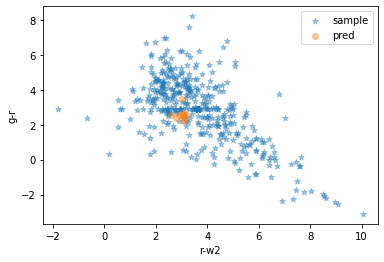

In [70]:
# g-r VS r-w2
plt.scatter(qso_mag_r-qso_mag_w2, qso_mag_g - qso_mag_r, marker='*', alpha=0.4, label='sample')
plt.scatter(output['r-w2'], output['g_r'], marker='o', alpha=0.4, label='pred')
plt.xlabel('r-w2')
plt.ylabel('g-r')
plt.legend()
plt.show()

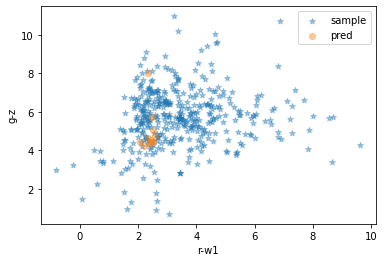

In [71]:
# g-z VS r-w1
plt.scatter(qso_mag_r-qso_mag_w1, qso_mag_g - qso_mag_z, marker='*', alpha=0.4, label='sample')
plt.scatter(output['r-w1'], output['g-z'], marker='o', alpha=0.4, label='pred')
plt.xlabel('r-w1')
plt.ylabel('g-z')
plt.legend()
plt.show()

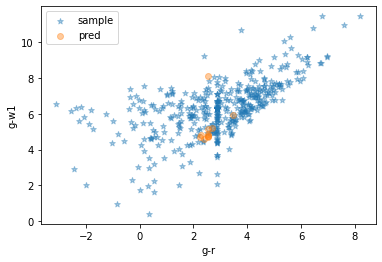

In [72]:
# g-w1 VS g-r
plt.scatter(qso_mag_g-qso_mag_r, qso_mag_g - qso_mag_w1, marker='*', alpha=0.4, label='sample')
plt.scatter(output['g_r'], output['mag_g']-output['mag_w1'], marker='o', alpha=0.4, label='pred')
plt.xlabel('g-r')
plt.ylabel('g-w1')
plt.legend()
plt.show()

### results from papers

different bands...

### output file

In [56]:
# now put NaN back
print(data_replace.keys())
print(output.columns)
for col in data_replace.keys():
    if col in output.columns:
        output.loc[output[col] == data_replace[col], col] = np.nan
print(output.head())

dict_keys(['mag_g', 'mag_r', 'mag_z', 'mag_w1', 'mag_w2', 'g_r', 'snr_g', 'snr_r', 'snr_z', 'snr_w1', 'snr_w2'])
Index(['ra', 'dec', 'mag_g', 'mag_r', 'mag_z', 'mag_w1', 'mag_w2', 'g_r',
       'snr_g', 'snr_r', 'snr_z', 'snr_w1', 'snr_w2', 'g-z', 'r-w1', 'r-w2',
       'z-w1', 'z-w2'],
      dtype='object')
                          ra        dec      mag_g      mag_r      mag_z  \
ls_id                                                                      
9907734910861893  236.353828  39.940718  28.208855  24.943724  22.744790   
9907734691842630  233.979866  39.316343  26.569958  23.658419  22.638737   
9907734910403323  234.093308  39.993242  29.232122  23.680270  22.207930   
9907734910340285  233.984849  39.944774  27.286922  24.173388  21.452580   
9907734837725363  233.683483  39.768447        NaN  23.842480  21.610052   

                     mag_w1     mag_w2       g_r     snr_g     snr_r  \
ls_id                                                                  
9907734910861

In [57]:
outfile = 'rf_mag_results03.csv'
output.to_csv(outfile, index=False)
output.to_csv(r'rf_mag_results03.csv')